# Build a model to predict/recommend the user a movie based on the movie we watched earlier. 

# Problem Statement:
**Its to analyse the data and recommend Movies available on Netflix to the user. Building a NETFLIX Recommendation Model based on the dataset.**
*As to save time for user that he/she gonna take to find a relatable movie.*
*By the help of this model they will be able to find relatable movies on netflix with ease.*


# DataSet:
This dataset is widely available.This dataset consists of movies & tv shows available on Netflix.
The dataset is collected from Flixable which is a third-party Netflix search engine.



# Step 1: Import all the required libraries
- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [68]:
#Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


Now, we are going to read our problem dataset and have a look on it.

In [69]:
#df = pd.read_csv('netflix_titles.csv'')

#loading training data
try:
    df = pd.read_csv('netflix_titles.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [70]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [71]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 7787 rows and 12 columns


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


With the info function will get to know that we have zero non null values to whole dataset and we have only one numerical type, 10 object type data in our dataset.


**Now will count the separatly every data type column list**

In [73]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [74]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)

total number of numerical columns are  1
there names are as follows:  ['release_year']


In [75]:
object_cols = ['object']
object_lst = list(df.select_dtypes(include=object_cols).columns)

In [76]:
print("total number of numerical columns are ", len(object_lst))
print("there names are as follows: ", object_lst)

total number of numerical columns are  11
there names are as follows:  ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


# DATA PREPROCESSING

**As you noticed this dataset has TV Shows & Movies both, but we dont need TV Shows, so we gonna remove TV Shows rows from dataset **

In [77]:
df = df[df['type']!='TV Show']

In [78]:
# We confirmed wether its removed or not from dataset
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [79]:
# After removing TV Shows row from dataset we need to count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 5377 rows and 12 columns


**Now, We need to check for rows containing NULL values and drop them which will be done by using The dropna() function.**


In [80]:
df = df.dropna()

In [81]:
# We need to count the total number of rows and columns again after droping rows containing NULL values.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 4673 rows and 12 columns


**As we have removed so many rows from the original dataset,  we need to reassign/reset index values in dataset**


In [82]:
df.reset_index(inplace=True) 

In [83]:
df.iloc[100].title

'A Bad Moms Christmas'

In [84]:
df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668,7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
4669,7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
4670,7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
4671,7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


# In this step:
We will see which column we will use while recommending movies to the user or which columns are importat to us.



**Whats our approach here, So think of like this what will tell your friend when you gonna recommend him/her any movie.**

There are mainly 2 types of recommending system 
1. Content based  
2. Collaborative Filttering  
3. Hybrid 

For our workflow we gonna use 1st system.


# - Step 3: 
1. Selecting Columns
2. Check NULL and NAN Values


# 1. Selecting columns
- title ~ its a must as without it u cant reommend anyone movie, its not like u will tell some there was this movie but u dont know the title.
- cast ~ it's very important, cast is what make a movie to reach its fullest potiential, assume you are making a movie but there are not popular face, it engagement/reach wont be that good.
- listen_in ~ it's like gener , so its important
- descripiton ~ many user like to see movie which has similar description.
- rating ~ essential, like a user want to see a movie with his childer who are underaged so they will look for it.
- country ~ essential

- director ~ it can be neglected as many of us dont look for director in a movie
- duration ~ no
- date_added can be a factor for recommending a movie but let it slide 


In [85]:
#df = df[['show_id', 'date_added', 'country', 'date_added', 'release_year', 'duration' , 'duration']]
df= df[['title','cast','listed_in','description','rating', 'country', 'director', 'release_year']]





- if 'description', 'listed_in' , 'cast','rating', 'country', 'release_year', 'director' are put together in a single column (tags : it will help to recommend movie as more similar is the tag column of a movie to other, that movie will be recommended to user
- similarity would mean recommending would be easy

In [86]:
df.shape

(4673, 8)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4673 non-null   object
 1   cast          4673 non-null   object
 2   listed_in     4673 non-null   object
 3   description   4673 non-null   object
 4   rating        4673 non-null   object
 5   country       4673 non-null   object
 6   director      4673 non-null   object
 7   release_year  4673 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 292.2+ KB


In [88]:
df.head()

,title,cast,listed_in,description,rating,country,director,release_year
0,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,TV-MA,Mexico,Jorge Michel Grau,2016
1,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow...",R,Singapore,Gilbert Chan,2011
2,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",PG-13,United States,Shane Acker,2009
3,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...,PG-13,United States,Robert Luketic,2008
4,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Horror Movies, International Movies","After an awful accident, a couple admitted to ...",TV-MA,Egypt,Yasir Al Yasiri,2019


**The UNIQUE function returns a list of unique values in a list or range**

In [89]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**In 'rating' column there is so many diverse value so we will sort them below:
Why? So it would more easy to recommend movies to user**

In [90]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
} 
#replacing ratings ages with some category (older kids , adults , teens , kids)

In [91]:
#replace the ratings with above category 
df['different_ages'] = df['rating'].replace(ratings_ages) 
df['different_ages'].unique() 

array(['Adults', 'Teens', 'Kids', 'Older Kids'], dtype=object)

In [92]:
#as we have made a new column 'different_ages'
#lets drop 'rating'
df=df.drop(['rating'],axis=1)

**Here the 'release_year' col is in64 type data , so we gonna convert into string/object type data **

In [93]:
df['release_year'] = df['release_year'].map(str)

In [94]:
#verify if its removed
df.head()

,title,cast,listed_in,description,country,director,release_year,different_ages
0,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,Jorge Michel Grau,2016,Adults
1,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,Gilbert Chan,2011,Adults
2,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,Shane Acker,2009,Teens
3,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...,United States,Robert Luketic,2008,Teens
4,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt,Yasir Al Yasiri,2019,Adults


Now, We have the desired dataset 

In [95]:
t=df['title'].unique()
t

array(['7:19', '23:59', '9', ..., 'Zoom', 'Zozo', 'Zubaan'], dtype=object)

In [96]:
#Checking for duplicate
df.duplicated().sum()

0

In [97]:
#Confirming if all needed cols are of object type data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4673 non-null   object
 1   cast            4673 non-null   object
 2   listed_in       4673 non-null   object
 3   description     4673 non-null   object
 4   country         4673 non-null   object
 5   director        4673 non-null   object
 6   release_year    4673 non-null   object
 7   different_ages  4673 non-null   object
dtypes: object(8)
memory usage: 292.2+ KB


# 2. Checking for Null or Nan Values in the dataset

In [98]:
df.isnull().sum()


title             0
cast              0
listed_in         0
description       0
country           0
director          0
release_year      0
different_ages    0
dtype: int64

There is no null values in dataseta

In [99]:
df.isna().sum()

title             0
cast              0
listed_in         0
description       0
country           0
director          0
release_year      0
different_ages    0
dtype: int64

There is no nan vlaue in dataset

In [100]:
df

,title,cast,listed_in,description,country,director,release_year,different_ages
0,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,Jorge Michel Grau,2016,Adults
1,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,Gilbert Chan,2011,Adults
2,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,Shane Acker,2009,Teens
3,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...,United States,Robert Luketic,2008,Teens
4,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt,Yasir Al Yasiri,2019,Adults
...,...,...,...,...,...,...,...,...
4668,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,Ruben Fleischer,2009,Adults
4669,Zoo,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...","Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,India,Shlok Sharma,2018,Adults
4670,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,Peter Hewitt,2006,Older Kids
4671,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"Sweden, Czech Republic, United Kingdom, Denmar...",Josef Fares,2005,Adults


In [101]:
#cols = [cast, listed_in, description, director,different_ages]

In [102]:
#for value in cols:
    #print(value, df.iloc[0].value)

In [103]:
#here u can see there are so many values/name cast in  'cast' col
df.iloc[2].cast

'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane'

We will select only 5 memeber of crew

In [104]:
df.iloc[2].director

'Shane Acker'

# Step 3: To get the desired dataset we need to follow these steps:

We need to convert string values of column in list 
1. Converting values of coulmns which are string into list, separately
2. Concatenate these converted cols in a single col 'tags'
3. then convert these tag col into string again ~ a big paragraph
- after this 
we can start working on making recommending syatem now.

In [105]:
df.iloc[2]

title                                                             9
cast              Elijah Wood, John C. Reilly, Jennifer Connelly...
listed_in         Action & Adventure, Independent Movies, Sci-Fi...
description       In a postapocalyptic world, rag-doll robots hi...
country                                               United States
director                                                Shane Acker
release_year                                                   2009
different_ages                                                Teens
Name: 2, dtype: object

**By The iloc() function, we can easily retrieve any particular value from a row or column using index values.**

In [106]:
df.iloc[2].listed_in

'Action & Adventure, Independent Movies, Sci-Fi & Fantasy'

As u can see they are string we need to convert them into list, so we ccan concatenate them

# 1.  Converting values of coulmns which are string into list separately 

In [107]:
 
df['description'] = df['description'].apply(lambda x:x.split())

In [108]:
#Here there is no much data in cast, we are only taking 3 members of the cast
df['cast'] = df['cast'].apply(lambda x:x.split()[:5])

In [109]:
df['listed_in'] = df['listed_in'].apply(lambda x:x.split())

In [110]:
df['different_ages'] = df['different_ages'].apply(lambda x:x.split())

In [111]:
df['country'] = df['country'].apply(lambda x:x.split())

In [112]:
df['release_year'] = df['release_year'].apply(lambda x:x.split())

In [113]:
df['director'] = df['director'].apply(lambda x:x.split(" "))
##df['director'] = df['director'].apply(lambda x: x.split(',')).tolist()

In [114]:
df.head()

,title,cast,listed_in,description,country,director,release_year,different_ages
0,7:19,"[Demián, Bichir,, Héctor, Bonilla,, Oscar]","[Dramas,, International, Movies]","[After, a, devastating, earthquake, hits, Mexi...",[Mexico],"[Jorge, Michel, Grau]",[2016],[Adults]
1,23:59,"[Tedd, Chan,, Stella, Chung,, Henley]","[Horror, Movies,, International, Movies]","[When, an, army, recruit, is, found, dead,, hi...",[Singapore],"[Gilbert, Chan]",[2011],[Adults]
2,9,"[Elijah, Wood,, John, C., Reilly,]","[Action, &, Adventure,, Independent, Movies,, ...","[In, a, postapocalyptic, world,, rag-doll, rob...","[United, States]","[Shane, Acker]",[2009],[Teens]
3,21,"[Jim, Sturgess,, Kevin, Spacey,, Kate]",[Dramas],"[A, brilliant, group, of, students, become, ca...","[United, States]","[Robert, Luketic]",[2008],[Teens]
4,122,"[Amina, Khalil,, Ahmed, Dawood,, Tarek]","[Horror, Movies,, International, Movies]","[After, an, awful, accident,, a, couple, admit...",[Egypt],"[Yasir, Al, Yasiri]",[2019],[Adults]


# Transformation

Here we are replacing "space" with "," / basically into list


In [115]:
#df['listed_in'] = df['listed_in'].apply(lambda x:[i.replace(" ","")for i in x])
#df['cast'] = df['cast'].apply(lambda x:[i.replace(" ","")for i in x])
#df['description'] = df['description'].apply(lambda x:[i.replace(" ","")for i in x])
#df['director'] = df['director'].apply(lambda x:[i.replace(" ","")for i in x])
#df['country'] = df['country'].apply(lambda x:[i.replace(" ","")for i in x])
#df['different_ages'] = df['different_ages'].apply(lambda x:[i.replace(" ","")for i in x])
df['director'] = df['director'].apply(lambda x:[i.replace(",","")for i in x])

In [116]:
df.head(100)

,title,cast,listed_in,description,country,director,release_year,different_ages
0,7:19,"[Demián, Bichir,, Héctor, Bonilla,, Oscar]","[Dramas,, International, Movies]","[After, a, devastating, earthquake, hits, Mexi...",[Mexico],"[Jorge, Michel, Grau]",[2016],[Adults]
1,23:59,"[Tedd, Chan,, Stella, Chung,, Henley]","[Horror, Movies,, International, Movies]","[When, an, army, recruit, is, found, dead,, hi...",[Singapore],"[Gilbert, Chan]",[2011],[Adults]
2,9,"[Elijah, Wood,, John, C., Reilly,]","[Action, &, Adventure,, Independent, Movies,, ...","[In, a, postapocalyptic, world,, rag-doll, rob...","[United, States]","[Shane, Acker]",[2009],[Teens]
3,21,"[Jim, Sturgess,, Kevin, Spacey,, Kate]",[Dramas],"[A, brilliant, group, of, students, become, ca...","[United, States]","[Robert, Luketic]",[2008],[Teens]
4,122,"[Amina, Khalil,, Ahmed, Dawood,, Tarek]","[Horror, Movies,, International, Movies]","[After, an, awful, accident,, a, couple, admit...",[Egypt],"[Yasir, Al, Yasiri]",[2019],[Adults]
...,...,...,...,...,...,...,...,...
95,7 Khoon Maaf,"[Priyanka, Chopra,, Neil, Nitin, Mukesh,]","[Dramas,, International, Movies,, Thrillers]","[Spiced, liberally, with, black, comedy,, this...",[India],"[Vishal, Bhardwaj]",[2011],[Adults]
96,90 ML,"[Oviya,, Masoom, Shankar,, Bommu, Lakshmi,]","[Comedies,, International, Movies,, Music, &, ...","[Four, friends, shake, up, their, lives, when,...",[India],"[Anita, Udeep]",[2019],[Adults]
97,93 Days,"[Bimbo, Akintola,, Somkele, Iyamah,, Danny]","[Dramas,, International, Movies,, Thrillers]","[Heroic, health, workers, fight, to, contain, ...",[Nigeria],"[Steve, Gukas]",[2016],"[Older, Kids]"
98,A 2nd Chance,"[Nina, Pearce,, Adam, Tuominen,, Emily]","[Children, &, Family, Movies,, Dramas,, Sports...","[A, gymnast, lacks, the, confidence, she, need...",[Australia],"[Clay, Glen]",[2011],"[Older, Kids]"


In [117]:
#checking if 'cast' col has only limited crew member
df['cast'].iloc[2]

['Elijah', 'Wood,', 'John', 'C.', 'Reilly,']

# 2. Concatenate these converted cols in a single col 'tags'

In [118]:
df['tags'] = df['description'] +  df['listed_in'] + df['cast'] + df['different_ages'] + df['country'] +df['director'] + df['release_year']

In [119]:
df.head()

,title,cast,listed_in,description,country,director,release_year,different_ages,tags
0,7:19,"[Demián, Bichir,, Héctor, Bonilla,, Oscar]","[Dramas,, International, Movies]","[After, a, devastating, earthquake, hits, Mexi...",[Mexico],"[Jorge, Michel, Grau]",[2016],[Adults],"[After, a, devastating, earthquake, hits, Mexi..."
1,23:59,"[Tedd, Chan,, Stella, Chung,, Henley]","[Horror, Movies,, International, Movies]","[When, an, army, recruit, is, found, dead,, hi...",[Singapore],"[Gilbert, Chan]",[2011],[Adults],"[When, an, army, recruit, is, found, dead,, hi..."
2,9,"[Elijah, Wood,, John, C., Reilly,]","[Action, &, Adventure,, Independent, Movies,, ...","[In, a, postapocalyptic, world,, rag-doll, rob...","[United, States]","[Shane, Acker]",[2009],[Teens],"[In, a, postapocalyptic, world,, rag-doll, rob..."
3,21,"[Jim, Sturgess,, Kevin, Spacey,, Kate]",[Dramas],"[A, brilliant, group, of, students, become, ca...","[United, States]","[Robert, Luketic]",[2008],[Teens],"[A, brilliant, group, of, students, become, ca..."
4,122,"[Amina, Khalil,, Ahmed, Dawood,, Tarek]","[Horror, Movies,, International, Movies]","[After, an, awful, accident,, a, couple, admit...",[Egypt],"[Yasir, Al, Yasiri]",[2019],[Adults],"[After, an, awful, accident,, a, couple, admit..."


In [120]:
#Putting 'title', 'tags' into a final_df
final_df = df[['title', 'tags']] 

In [121]:
#looking at final dataset
final_df.head()

,title,tags
0,7:19,"[After, a, devastating, earthquake, hits, Mexi..."
1,23:59,"[When, an, army, recruit, is, found, dead,, hi..."
2,9,"[In, a, postapocalyptic, world,, rag-doll, rob..."
3,21,"[A, brilliant, group, of, students, become, ca..."
4,122,"[After, an, awful, accident,, a, couple, admit..."


# 3. Then convert this 'tags' col into string again 
Which will become a big paragraph

'tags' cols is in list, which we need to convert into string below:

In [138]:
final_df['tags'] = final_df['tags'].apply(lambda x:" ".join(x))

*Converting list into string*

In [123]:
final_df.head(10)

,title,tags
0,7:19,After a devastating earthquake hits Mexico Cit...
1,23:59,"When an army recruit is found dead, his fellow..."
2,9,"In a postapocalyptic world, rag-doll robots hi..."
3,21,A brilliant group of students become card-coun...
4,122,"After an awful accident, a couple admitted to ..."
5,187,After one of his high school students attacks ...
6,706,"When a doctor goes missing, his psychiatrist w..."
7,1920,An architect and his wife move into a castle t...
8,1922,A farmer pens a confession admitting to his wi...
9,"2,215",This intimate documentary follows rock star Ar...


In [124]:
#convert that string in lower as its recommended 
final_df['tags']=final_df['tags'].apply(lambda x:x.lower())

In [125]:
#confirming we did convert string into lower case
final_df['tags'][1]

"when an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. horror movies, international movies tedd chan, stella chung, henley adults singapore gilbert chan 2011"

# Approach we took here

- We need to calculated the simlarities btw MOVIE1 tag and MOVIE2 tag. 
- But the thing is the similarities would depend on the how much similar is the text of these 2 MOVIES tag are.
- Thats what we have to find(similarity) ,but how? generally speaking you would check by comparing the no of similar words btw MOVIES tag and whichever tag has higest similarity , will be recommended to user as user type the movie 
- It's all text and not numbers or numerical values, plus comparing both MOVIES tags text similarity is not a ideal way to approach the problem
- Here comes the concept of vectorization. Basically, Text vectorization

# Step 4: Now, that we have desired dataset we need to do follow these steps:



https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
1. Vectorization ~ which will give us the most frequent words of each paticular movies
2. Stemming 
3. cosine_similarity ~ which is the distance btw various movies 
4. Similarity
5. Dissimilarity

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')
#max ~ wich will tell how much words we need to take


In [127]:
#converting tags into array
vectors = cv.fit_transform(final_df['tags']).toarray()



In [128]:
vectors
#2-D array 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(vectors.shape[0],vectors.shape[1]))

The train data has 4673 rows and 5000 columns


In [130]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
# with get_features_names() u will get the most frequent word of all movies in a list
cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

**[abduct , abducts, abducted, abduction] ---->**


- as u can see abduct, abducts, abducted are all same but has become new features 
- to sort this we are using stemming
- after applying you will see these changes


**--->[abduct, abduct, abduct, abduct]**

In [136]:
import nltk

**The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.**

In [137]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [139]:
#making a function 
#for stemming each text in 'tags' col
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [140]:
#Calling the function 
stem('After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. Dramas, International Movies Demián Bichir, Héctor Adults')

'after a devast earthquak hit mexico city, trap survivor from all walk of life wait to be rescu while tri desper to stay alive. dramas, intern movi demián bichir, héctor adult'

**As u can see it working fine lets apply it on whole 'tags' cols**

In [141]:
final_df['tags'] =  final_df['tags'].apply(stem)

In [142]:
final_df['tags']

0       a f t e r a d e v a s t a t i n g e a r t h q ...
1       w h e n a n a r m y r e c r u i t i s f o u n ...
2       i n a p o s t a p o c a l y p t i c w o r l d ...
3       a b r i l l i a n t g r o u p o f s t u d e n ...
4       a f t e r a n a w f u l a c c i d e n t , a c ...
                              ...                        
4668    l o o k i n g t o s u r v i v e i n a w o r l ...
4669    a d r u g d e a l e r s t a r t s h a v i n g ...
4670    d r a g g e d f r o m c i v i l i a n l i f e ...
4671    w h e n l e b a n o n ' s c i v i l w a r d e ...
4672    a s c r a p p y b u t p o o r b o y w o r m s ...
Name: tags, Length: 4673, dtype: object

#  Now that we done stemming , we will check if its really done in vectorization or not, so lets repeat the process of vectorization and check ourself

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [144]:
vectors = cv.fit_transform(final_df['tags']).toarray()

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
cv.get_feature_names()

['000',
 '10',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '1930',
 '1950',
 '1958',
 '1960',
 '1960s',
 '1962',
 '1967',
 '1968',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21st',
 '24',
 '25',
 '30',
 '40',
 '50',
 '500',
 '60',
 '80',
 '90',
 'aamir',
 'aaron',
 'aaryan',
 'abandon',
 'abba',
 'abbi',
 'abdel',
 'abduct',
 'abdulaziz',
 'abdullah',
 'abe',
 'abhay',
 'abhishek',
 'abigail',
 'abil',
 'abl',
 'aboard',
 'abou',
 'abov',
 'abraham',
 'abroad',
 'abruptli',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',


**Noticed ~ Changes can be seen**

# 3. cosine_similarity ~ which is the distance btw various movies

**Now , we have to calculate the distance btw a movie with other movie/distnace among these movies.  In vector**
- the more the distance ~ less similarities
- distance = 1/similarity


**TO get Distance btw 2 movies, it will be done by angle (cosine 0) :**

cos 0 =(adjacent)/(hypotenuse). 


- 0 degree ~ same
- 5 degree ~ similar
- 10 degree ~ similar
- 180 degree ~ disimilar

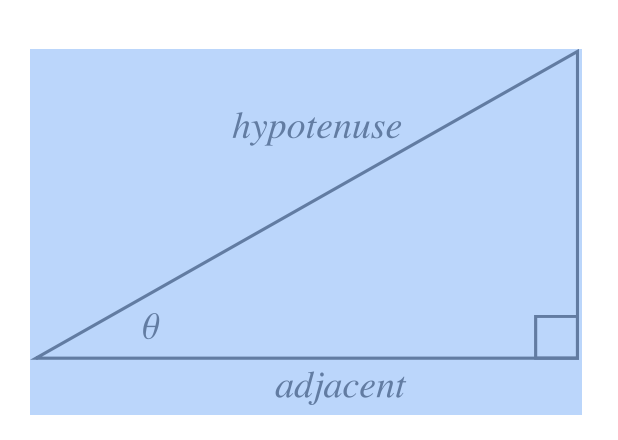

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [145]:
from sklearn.metrics.pairwise import cosine_similarity

In [146]:
#here we have put all vectors to find distance(cos0)
similarity = cosine_similarity(vectors)


In [147]:
# count the total number of rows and columns for similarity.
print ('The train data has {0} rows and {1} columns'.format(similarity.shape[0],similarity.shape[1]))

The train data has 4673 rows and 4673 columns


**this is the distance btw of each vectors with other vectors i.e one movie distance with other 4673 movies, So total no. of distances calculated is 4673*4673=21836929.**

In [148]:
for i in range (3):
    print(similarity[i])

[1.         0.15118579 0.04082483 ... 0.08944272 0.15689291 0.11547005]
[0.15118579 1.         0.07715167 ... 0.08451543 0.14824986 0.10910895]
[0.04082483 0.07715167 1.         ... 0.13693064 0.08006408 0.11785113]


1. This is telling us the similarity of 1st movies with others 
2. When u gonna look at this matrix its diagonal element gona be 1, but why because the distance btw 1st movie with 1st movie will cos0=1 same as movie2 distance with movie2 will be cos0 = 1 and vice versa.


----------------------------------------------------------------------------------------------------------------

# IN THIS PART 
1. We gonna fetch index of movies to get into matrix so we can select out those movies and sort their distances.
2. Most similar movies will come first and will follow the cycle.
3. Then we will show top 5 or 10 similar movies to recommend.

In [149]:
sorted(similarity[0], reverse=True)

# In highest similarity order

[1.0000000000000004,
 0.4233901974057256,
 0.36742346141747684,
 0.35777087639996635,
 0.3530090432487313,
 0.35000000000000003,
 0.3481553119113957,
 0.3411211461689767,
 0.3395498750508662,
 0.3336230624913197,
 0.32998316455372223,
 0.3265986323710905,
 0.32659863237109044,
 0.32000000000000006,
 0.3098386676965933,
 0.30792014356780045,
 0.3055050463303894,
 0.3055050463303894,
 0.30237157840738177,
 0.2984810028978546,
 0.2984810028978546,
 0.2984810028978546,
 0.297112541083283,
 0.2919201796799047,
 0.2919201796799047,
 0.2919201796799047,
 0.2919201796799047,
 0.2910427500435996,
 0.2857738033247042,
 0.2857738033247042,
 0.28577380332470415,
 0.28284271247461906,
 0.28284271247461906,
 0.28284271247461895,
 0.28,
 0.28,
 0.28,
 0.28,
 0.2785242495291166,
 0.2773500981126146,
 0.2752988806446741,
 0.2752988806446741,
 0.2752988806446741,
 0.2752988806446741,
 0.27456258919345766,
 0.27456258919345766,
 0.27456258919345766,
 0.27456258919345766,
 0.2694301256218254,
 0.269430125


- But there a catch here when we will sort we will loose index value like the distance of movie1 with movie2, movie3 as so on 
- so to counter this we gonna use enumrated function

In [150]:
#The enumerate function in Python converts a data collection object into an enumerate object
sorted(list(enumerate(similarity[0])),reverse=True,key =lambda x:x[1])[1:6]
# this is for similar

[(3131, 0.4233901974057256),
 (2734, 0.36742346141747684),
 (522, 0.35777087639996635),
 (3660, 0.3530090432487313),
 (2268, 0.35000000000000003)]

- we noticed that movies similar to movie1 are as follows: movie with index[3131,1357,2624,2734.3178]

In [151]:
#The enumerate function in Python converts a data collection object into an enumerate object
sorted(list(enumerate(similarity[0])),key =lambda x:x[1])[1:40]
# this is for dissimilar

[(31, 0.0),
 (36, 0.0),
 (46, 0.0),
 (53, 0.0),
 (54, 0.0),
 (64, 0.0),
 (128, 0.0),
 (165, 0.0),
 (170, 0.0),
 (266, 0.0),
 (303, 0.0),
 (308, 0.0),
 (354, 0.0),
 (355, 0.0),
 (363, 0.0),
 (369, 0.0),
 (416, 0.0),
 (417, 0.0),
 (418, 0.0),
 (419, 0.0),
 (499, 0.0),
 (507, 0.0),
 (525, 0.0),
 (539, 0.0),
 (547, 0.0),
 (567, 0.0),
 (593, 0.0),
 (613, 0.0),
 (632, 0.0),
 (638, 0.0),
 (639, 0.0),
 (642, 0.0),
 (643, 0.0),
 (660, 0.0),
 (682, 0.0),
 (714, 0.0),
 (720, 0.0),
 (794, 0.0),
 (824, 0.0)]

- we noticed that top dissimilar movies to movie1 are as follows : [3, 22, 31, 46, 53]

In [152]:
#cheking the title of most similar movies wrt to movie1
num = [3131,1357,2624,2734,3178]

In [153]:
def title(num):
     print(num, ':' ,"\n", final_df['title'][num])


In [154]:
title(num)

[3131, 1357, 2624, 2734, 3178] : 
 3131                       Rezeta
1357            For Greater Glory
2624    Mutiny of the Worker Bees
2734        No One Will Ever Know
3178                         ROMA
Name: title, dtype: object


In [155]:
#checking the top most dissimilar movies wrt to movie1
num1 = [3, 22, 31, 46, 53]

In [156]:
title(num1)

[3, 22, 31, 46, 53] : 
 3                       21
22            #realityhigh
31                Æon Flux
46                17 Again
53    20 Feet From Stardom
Name: title, dtype: object


# Function Creation/Main Model 

# 4. Similarity Function

In [157]:
def recommend(movie):
    movie_index = final_df[final_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key =lambda x:x[1])[1:10]
    
    for i in movies_list:
        print(final_df.iloc[i[0]].title)
        
    

In [158]:
#lets call similarity function
recommend('Yes Man')

The Love Guru
Wild Child
The Break-Up
Stranger than Fiction
Doctor Zhivago
ATM
The Theory of Everything
Jumping the Broom
Across the Universe


# 5. Dissimilarity Function

In [159]:
def disrec(movie):
    movie_index = final_df[final_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),key = lambda x:x[1])[1:10]
    
    for i in movies_list:
        print(final_df.iloc[i[0]].title)
        

In [160]:
#lets call similarity function
disrec('7:19')

Æon Flux
10,000 B.C.
17 Again
20 Feet From Stardom
2036 Origin Unknown
3 Days to Kill
A Grand Night In: The Story of Aardman
A Thousand Words
A Very Murray Christmas


In [161]:
recommend('Yamla Pagla Deewana 2')

Poster Boys
Singh Saab the Great
Soldier
Paulettante Veedu
Himmatwala
Bhaji In Problem
The Man Who Feels No Pain
Ghayal
Thank You


# Step : 5 Save Model
We are saving our model so we can access use it anywhere when we need

In [162]:
import pickle
pickle.dump(final_df, open('recommender_model.pkl', 'wb'))


In [163]:
#As to use similarity function later 
pickle.dump(similarity, open('similarity.pkl', 'wb'))